In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ibm_df = pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\Datasets\IBM_weekly.csv', sep = ',',header = 0)

ibm_df_tradingview=pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\BATS IBM, 1W.csv')

In [3]:
ibm_df['Date'] = pd.to_datetime(ibm_df['Date'], format = '%Y-%m-%d')
ibm_df_tradingview[ 'time']=pd.to_datetime(ibm_df_tradingview['time'], format = '%Y-%m-%d')
ibm_df_tradingview['time'] += pd.Timedelta(days=6)
ibm_df_tradingview=ibm_df_tradingview[(ibm_df_tradingview['time']>=pd.to_datetime('1994-03-06')) & (ibm_df_tradingview['time']<=pd.to_datetime('2024-03-03'))]
ibm_df_tradingview.reset_index(drop=True, inplace=True)

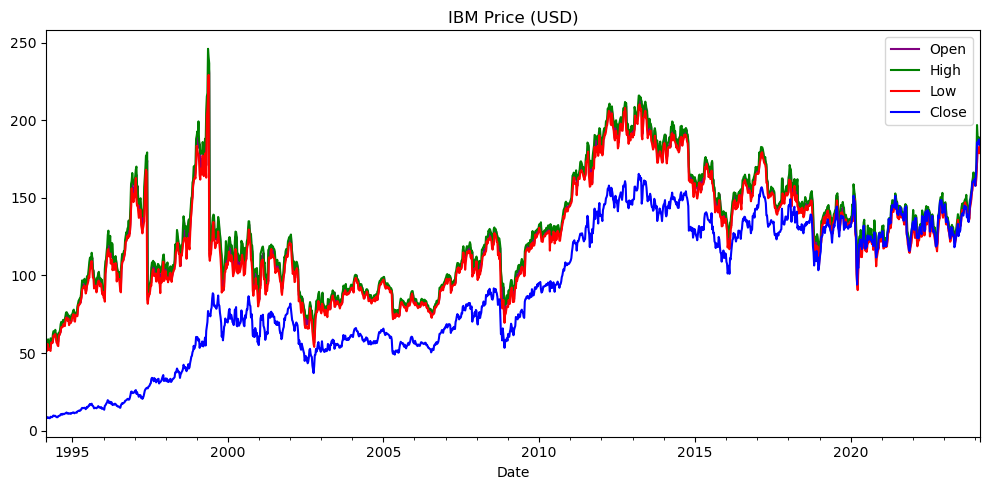

In [4]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df.plot(x='Date', y='Low', ax=ax, color = 'red')
ibm_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

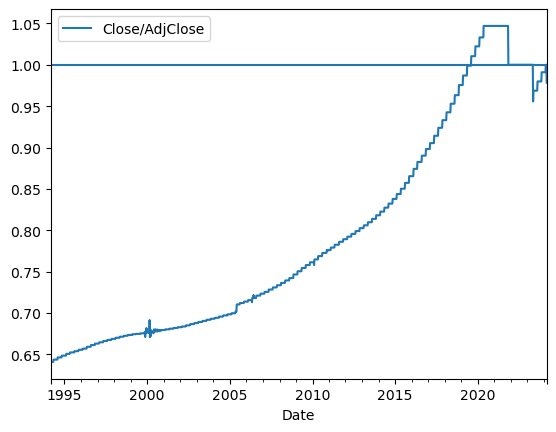

In [5]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=ibm_df['Date']
ratio_close['Close/AdjClose']=ibm_df['Close']/ibm_df_tradingview['close']

ratio_close.plot(x='Date', y='Close/AdjClose', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

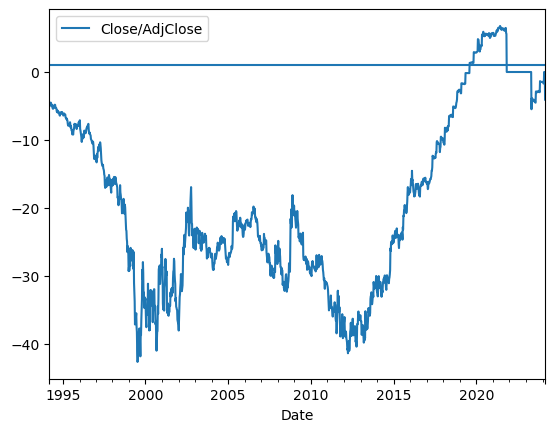

In [6]:
fig, ax=plt.subplots()
difference_close=pd.DataFrame()

difference_close['Date']=ibm_df['Date']
difference_close['Close/AdjClose']=ibm_df['Close']-ibm_df_tradingview['close']

difference_close.plot(x='Date', y='Close/AdjClose', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

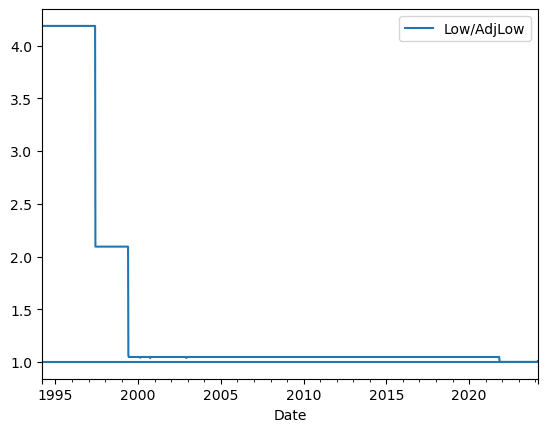

In [7]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()
ratio_close['Date']=ibm_df['Date']
ratio_close['Low/AdjLow']=ibm_df['Low']/ibm_df_tradingview['low']

ratio_close.plot(x='Date', y='Low/AdjLow', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

In [8]:
ibm_df.loc[ibm_df['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]/=1.046

# adjust for the 1999-05-27 split, plus the Open and High at 1999-05-30, which are an anomaly in the dataset
ibm_df.loc[ibm_df['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]/=2
ibm_df.loc[ibm_df['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]/=2

# adjust for the 1997-05-28 split, plus the Open and High at 1997-06-01, which are an anomaly in the dataset
ibm_df.loc[ibm_df['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]/=2
ibm_df.loc[ibm_df['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]/=2

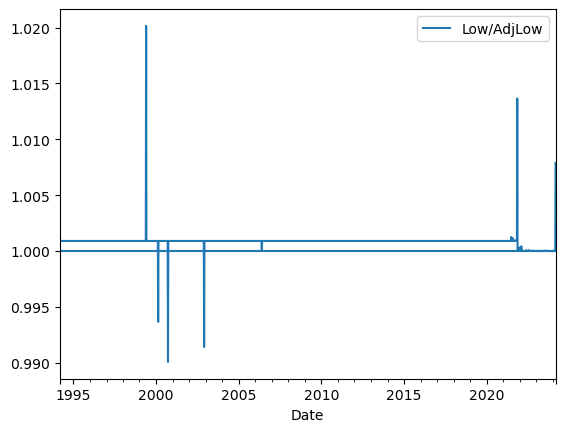

In [9]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()
ratio_close['Date']=ibm_df['Date']
ratio_close['Low/AdjLow']=ibm_df['Low']/ibm_df_tradingview['low']

ratio_close.plot(x='Date', y='Low/AdjLow', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

In [10]:
dividend_df=pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\ibm_dividends.csv', sep=';')

In [11]:
# Ensure 'Date' columns are in datetime format and sort by date
ibm_df['Date'] = pd.to_datetime(ibm_df['Date'])
ibm_df.sort_values('Date', inplace=True)
dividend_df['Ex/EFF Date'] = pd.to_datetime(dividend_df['Ex/EFF Date'])

# Ensure 'Cash Amount' is a float and remove the dollar sign
dividend_df['Cash Amount'] = dividend_df['Cash Amount'].replace('[\$,]', '', regex=True).astype(float)

# Iterate through each dividend payment
for index, row in dividend_df.iterrows():
    # Find the closing price of the day before the ex-dividend date
    close_price_day_before = ibm_df.loc[ibm_df['Date'] < row['Ex/EFF Date'], 'Close'].iloc[-1]

    # Calculate the adjustment factor
    adjustment_factor = (close_price_day_before - row['Cash Amount']) / close_price_day_before

    # Apply the adjustment factor to all historical prices prior to the ex-dividend date
    ibm_df.loc[ibm_df['Date'] < row['Ex/EFF Date'], 'Close'] *= adjustment_factor

# The 'Close' column is now adjusted and can be used for analysis

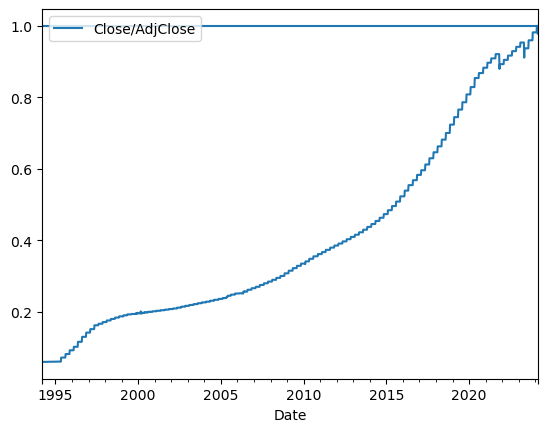

In [12]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=ibm_df['Date']
ratio_close['Close/AdjClose']=ibm_df['Close']/ibm_df_tradingview['close']

ratio_close.plot(x='Date', y='Close/AdjClose', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

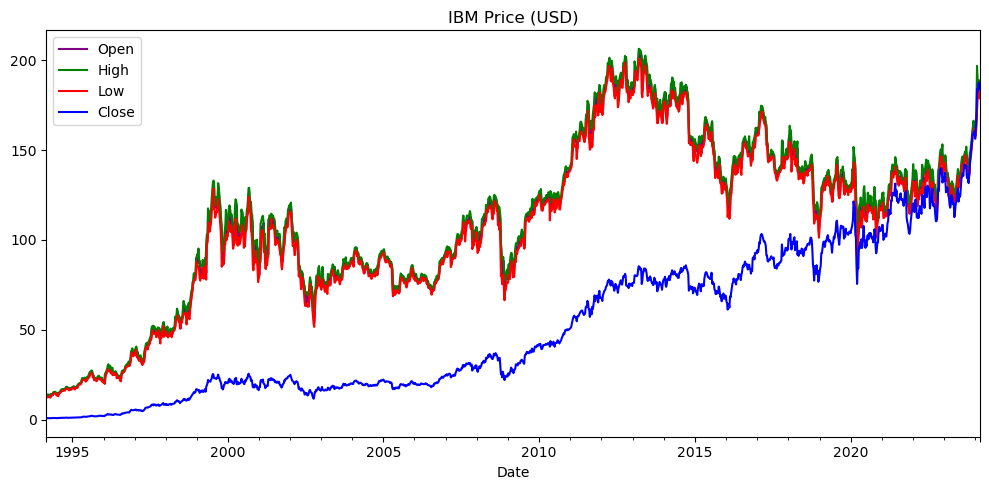

In [13]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df.plot(x='Date', y='Low', ax=ax, color = 'red')
ibm_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [14]:
cpi_index_monthly=pd.read_csv(r'C:\Users\Utente\Desktop\Luiss\ML\Final Project\cpi_index_monthly.csv', sep=';', header=None)
cpi_index_monthly.drop(columns=[0, 4], inplace=True)
cpi_index_monthly.rename(columns={1: 'year', 2:'month', 3:'value'}, inplace=True)

In [15]:
cpi_index_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    363 non-null    int64  
 1   month   363 non-null    object 
 2   value   363 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.6+ KB


In [16]:
# Convert month abbreviation to numeric format
cpi_index_monthly['month'] = cpi_index_monthly['month'].str.extract('(\d+)').astype(int)

In [17]:
cpi_index_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    363 non-null    int64  
 1   month   363 non-null    int32  
 2   value   363 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 7.2 KB


In [18]:
cpi_index_monthly

,year,month,value
0,1994,1,146.300
1,1994,2,146.700
2,1994,3,147.100
3,1994,4,147.200
4,1994,5,147.500
...,...,...,...
358,2023,11,308.024
359,2023,12,308.742
360,2024,1,309.685
361,2024,2,311.054


In [19]:
ibm_df['year'] = ibm_df['Date'].dt.year
ibm_df['month'] = ibm_df['Date'].dt.month
merged_df = ibm_df.merge(cpi_index_monthly, on=['year', 'month'], how='left')

In [20]:
merged_df.rename(columns={'value':'cpi_value'}, inplace=True)
merged_df

,Date,Open,High,Low,Close,Volume,year,month,cpi_value
0,1994-03-06,12.697180,12.876434,12.458174,0.758175,9055900,1994,3,147.100
1,1994-03-13,12.667304,13.444073,12.278920,0.805009,14884100,1994,3,147.100
2,1994-03-20,13.414197,13.951960,13.354446,0.823009,12402200,1994,3,147.100
3,1994-03-27,13.593451,14.071463,12.816683,0.777991,12237600,1994,3,147.100
4,1994-04-03,12.995937,13.145315,12.428298,0.787001,14114100,1994,4,147.200
...,...,...,...,...,...,...,...,...,...
1561,2024-02-04,187.460000,189.460000,182.710000,182.451500,28282700,2024,2,311.054
1562,2024-02-11,185.510000,187.180000,181.490000,186.340000,22784812,2024,2,311.054
1563,2024-02-18,185.900000,188.950000,182.260000,187.640000,21745006,2024,2,311.054
1564,2024-02-25,187.640000,188.770000,178.750000,185.720000,17487852,2024,2,311.054


In [21]:
# Calculate adjustment factor for each year relative to 2024
merged_df['adjustment_factor'] = ((312.23-merged_df['cpi_value'])/merged_df['cpi_value'])

# Adjust the 'Close' price accordingly
merged_df['Close'] *= (1+merged_df['adjustment_factor'])

In [22]:
merged_df

,Date,Open,High,Low,Close,Volume,year,month,cpi_value,adjustment_factor
0,1994-03-06,12.697180,12.876434,12.458174,1.609279,9055900,1994,3,147.100,1.122570
1,1994-03-13,12.667304,13.444073,12.278920,1.708689,14884100,1994,3,147.100,1.122570
2,1994-03-20,13.414197,13.951960,13.354446,1.746894,12402200,1994,3,147.100,1.122570
3,1994-03-27,13.593451,14.071463,12.816683,1.651341,12237600,1994,3,147.100,1.122570
4,1994-04-03,12.995937,13.145315,12.428298,1.669329,14114100,1994,4,147.200,1.121128
...,...,...,...,...,...,...,...,...,...,...
1561,2024-02-04,187.460000,189.460000,182.710000,183.141293,28282700,2024,2,311.054,0.003781
1562,2024-02-11,185.510000,187.180000,181.490000,187.044495,22784812,2024,2,311.054,0.003781
1563,2024-02-18,185.900000,188.950000,182.260000,188.349409,21745006,2024,2,311.054,0.003781
1564,2024-02-25,187.640000,188.770000,178.750000,186.422150,17487852,2024,2,311.054,0.003781


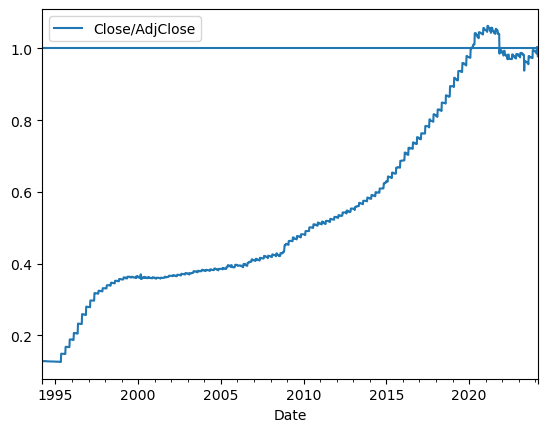

In [23]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=merged_df['Date']
ratio_close['Close/AdjClose']=merged_df['Close']/ibm_df_tradingview['close']

ratio_close.plot(x='Date', y='Close/AdjClose', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

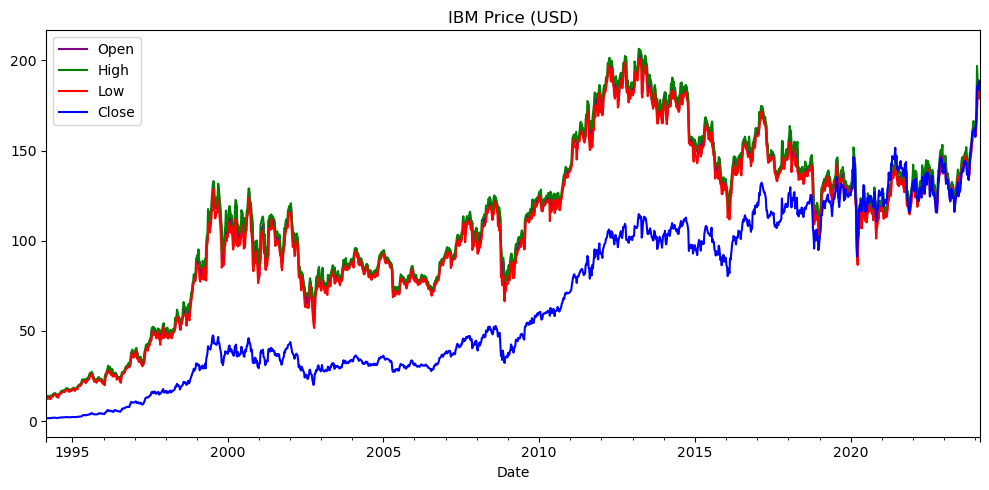

In [24]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df.plot(x='Date', y='Low', ax=ax, color = 'red')
merged_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [25]:
# Calculate 'Inferred_Close' based on the condition 'Low' > 'Close'
ibm_df['Inferred_Close'] = ibm_df['Open'].shift(periods=-1)
ibm_df.loc[ibm_df['Low'] > ibm_df['Close'], 'Inferred_Close'] = ibm_df['Inferred_Close']

# Fill NaN values in 'Inferred_Close' with corresponding 'Close' values
ibm_df['Inferred_Close'].fillna(ibm_df['Close'], inplace=True)

# Print the resulting DataFrame
ibm_df

,Date,Open,High,Low,Close,Volume,year,month,Inferred_Close
0,1994-03-06,12.697180,12.876434,12.458174,0.758175,9055900,1994,3,12.667304
1,1994-03-13,12.667304,13.444073,12.278920,0.805009,14884100,1994,3,13.414197
2,1994-03-20,13.414197,13.951960,13.354446,0.823009,12402200,1994,3,13.593451
3,1994-03-27,13.593451,14.071463,12.816683,0.777991,12237600,1994,3,12.995937
4,1994-04-03,12.995937,13.145315,12.428298,0.787001,14114100,1994,4,12.667304
...,...,...,...,...,...,...,...,...,...
1561,2024-02-04,187.460000,189.460000,182.710000,182.451500,28282700,2024,2,185.510000
1562,2024-02-11,185.510000,187.180000,181.490000,186.340000,22784812,2024,2,185.900000
1563,2024-02-18,185.900000,188.950000,182.260000,187.640000,21745006,2024,2,187.640000
1564,2024-02-25,187.640000,188.770000,178.750000,185.720000,17487852,2024,2,185.600000


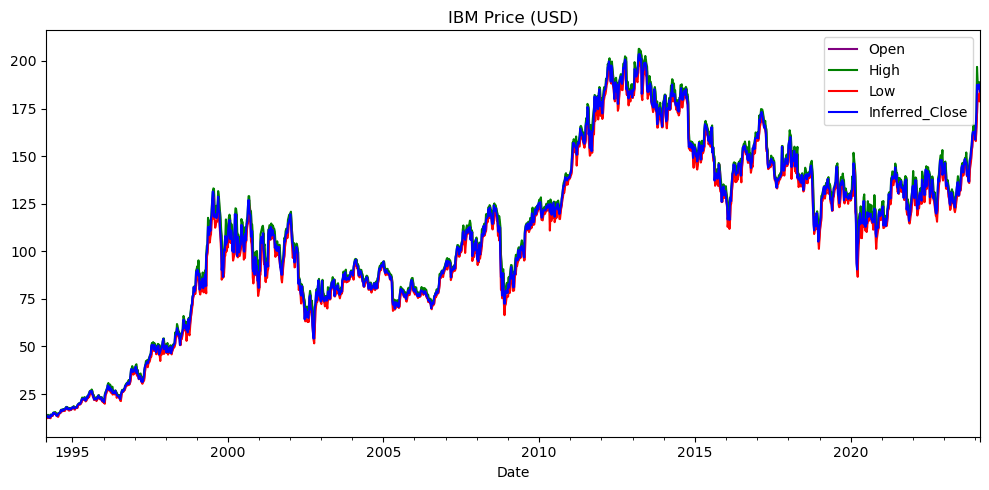

In [26]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df.plot(x='Date', y='Low', ax=ax, color = 'red')
ibm_df.plot(x='Date', y='Inferred_Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

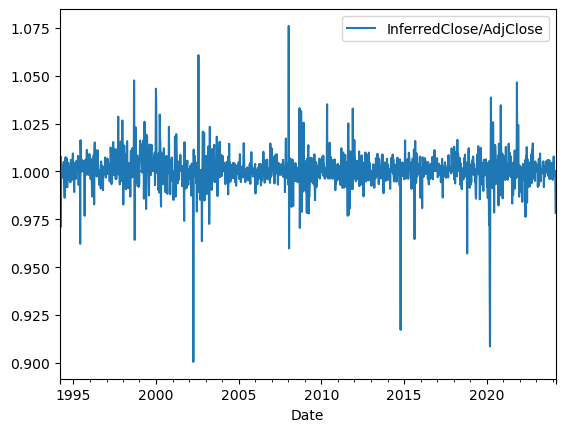

In [27]:
fig, ax=plt.subplots()
ratio_close=pd.DataFrame()

ratio_close['Date']=ibm_df['Date']
ratio_close['InferredClose/AdjClose']=ibm_df['Inferred_Close']/ibm_df_tradingview['close']

ratio_close.plot(x='Date', y='InferredClose/AdjClose', ax=ax)
plt.hlines(y=1, xmin=ibm_df['Date'].min(), xmax=ibm_df['Date'].max())

In [28]:
ibm_df_ok=pd.DataFrame()
ibm_df_ok['Date']=ibm_df['Date']
ibm_df_ok['Open']=ibm_df['Open']
ibm_df_ok['High']=ibm_df['High']
ibm_df_ok['Low']=ibm_df['Low']
ibm_df_ok['Close']=ibm_df['Inferred_Close']

In [29]:
ibm_df_ok

,Date,Open,High,Low,Close
0,1994-03-06,12.697180,12.876434,12.458174,12.667304
1,1994-03-13,12.667304,13.444073,12.278920,13.414197
2,1994-03-20,13.414197,13.951960,13.354446,13.593451
3,1994-03-27,13.593451,14.071463,12.816683,12.995937
4,1994-04-03,12.995937,13.145315,12.428298,12.667304
...,...,...,...,...,...
1561,2024-02-04,187.460000,189.460000,182.710000,185.510000
1562,2024-02-11,185.510000,187.180000,181.490000,185.900000
1563,2024-02-18,185.900000,188.950000,182.260000,187.640000
1564,2024-02-25,187.640000,188.770000,178.750000,185.600000


In [30]:
ibm_df_ok.to_csv(path_or_buf='IBM_weekly_ok.csv', sep=',', header=True, index=False)